# Import the required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset

In [8]:
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("The data is splitted into training (80%) and testing(20%) dataset")

The data is splitted into training (80%) and testing(20%) dataset


# Exploratory Data Analysis

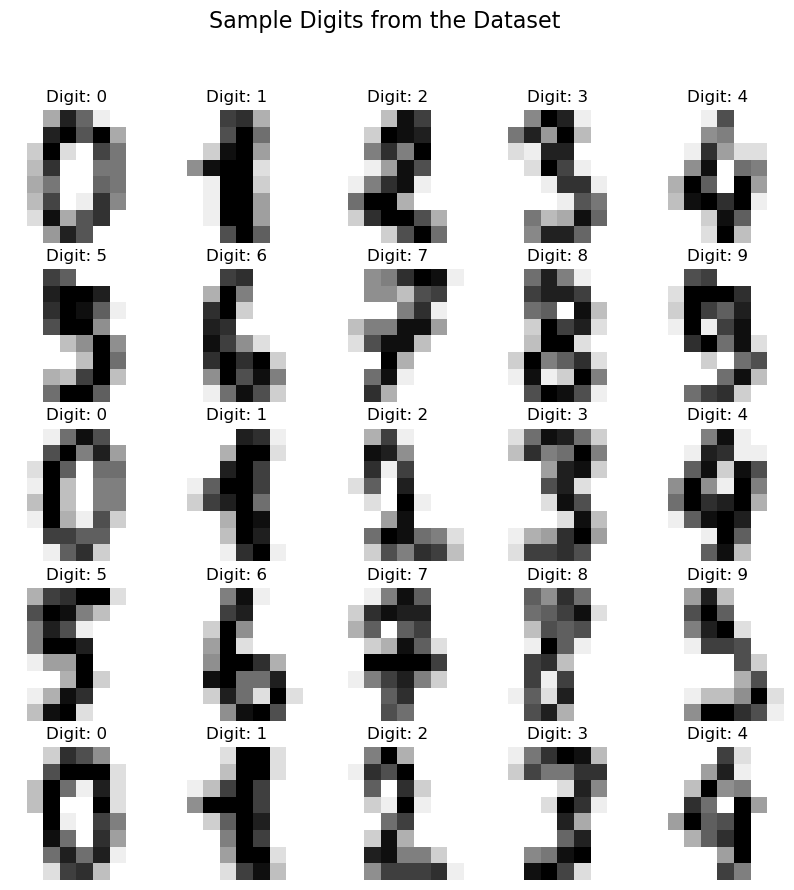

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(8,8), cmap='gray_r')
    plt.title(f"Digit: {y[i]}")
    plt.axis('off')
plt.suptitle('Sample Digits from the Dataset', fontsize=16)
plt.show()

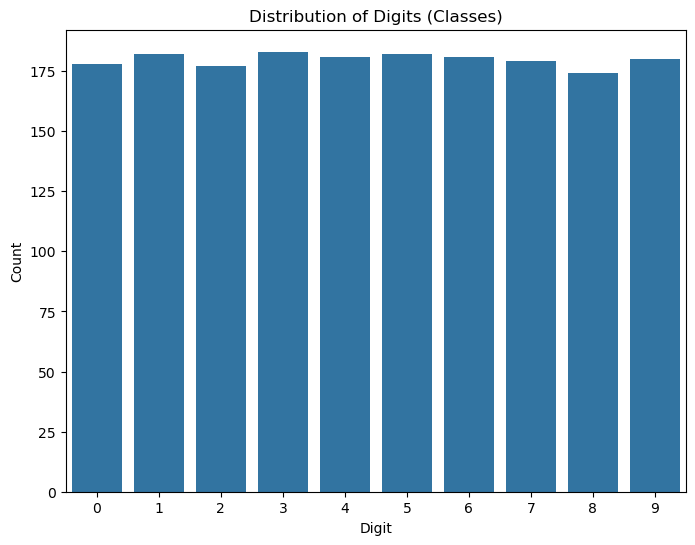

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x=y)
plt.title('Distribution of Digits (Classes)')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

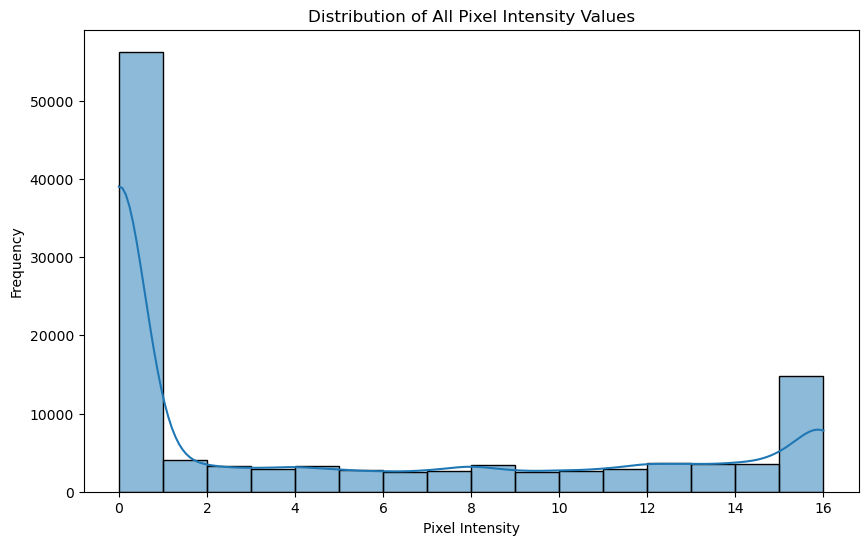

In [12]:
all_pixel_values = X.flatten()

plt.figure(figsize=(10,6))
sns.histplot(all_pixel_values, bins = 16, kde=True)
plt.title('Distribution of All Pixel Intensity Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

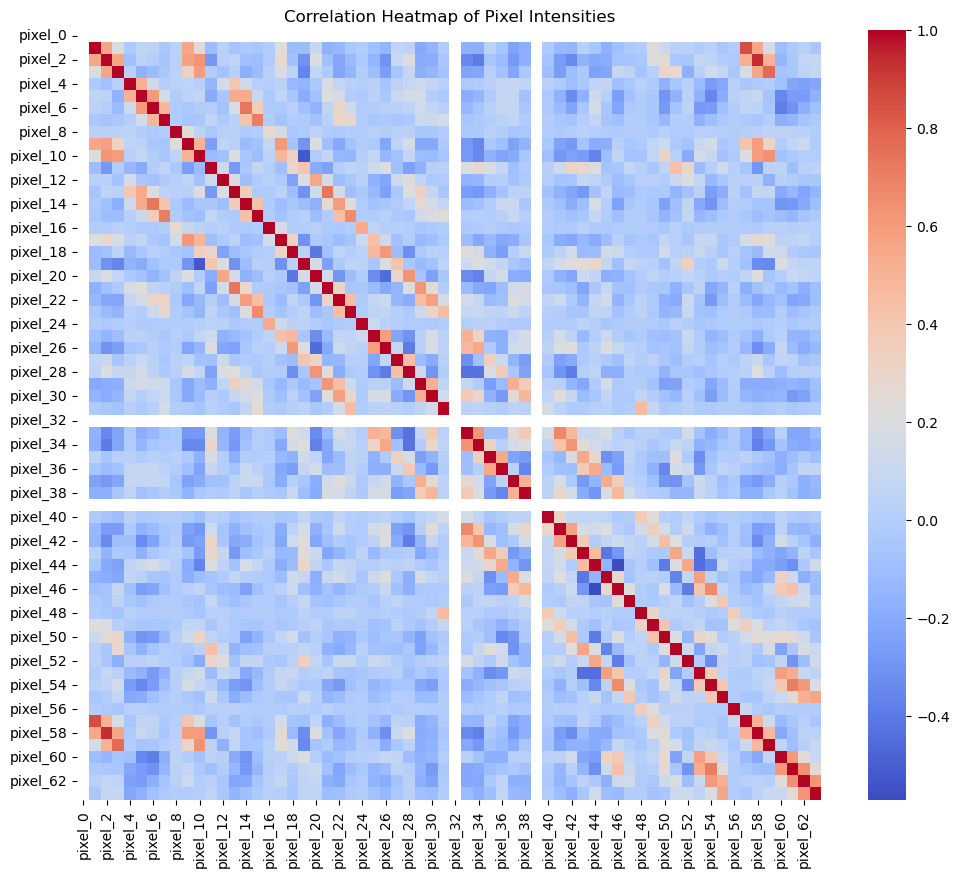

In [13]:
df_digits = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])

plt.figure(figsize=(12, 10))
sns.heatmap(df_digits.corr(), cmap='coolwarm', annot=False, fmt=".2f") # annot=False to prevent clutter
plt.title('Correlation Heatmap of Pixel Intensities')
plt.show()

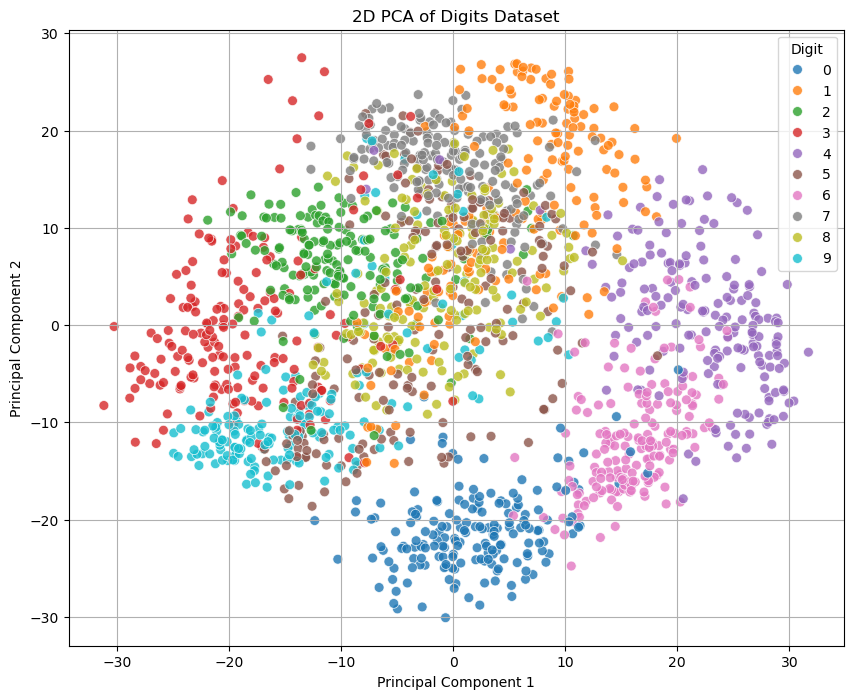

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['principal_component_1', 'principal_component_2'])
df_pca['target'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='target',
                palette='tab10', data=df_pca, legend='full', s=50, alpha=0.8)
plt.title('2D PCA of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit')
plt.grid(True)
plt.show()

# Data Scaling

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Apply the Model

In [19]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print("The KNN Model is applied!")

y_pred_knn = knn.predict(X_test_scaled)

The KNN Model is applied!


# Evaluating the Model

In [21]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"SVM Accuracy: {accuracy:.4f}")
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9889
SVM Accuracy: 0.9888888888888889


In [23]:
report = classification_report(y_test, y_pred_knn, target_names = [str(i) for i in digits.target_names])
print("Classification Report of KNN:\n" , report)

Classification Report of KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.00      0.98        32
           2       1.00      1.00      1.00        40
           3       1.00      0.97      0.99        39
           4       0.97      1.00      0.98        30
           5       0.98      1.00      0.99        44
           6       1.00      1.00      1.00        41
           7       0.97      0.97      0.97        38
           8       1.00      0.97      0.98        31
           9       1.00      0.97      0.98        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [26]:
knn_cm = confusion_matrix(y_test, y_pred_knn)

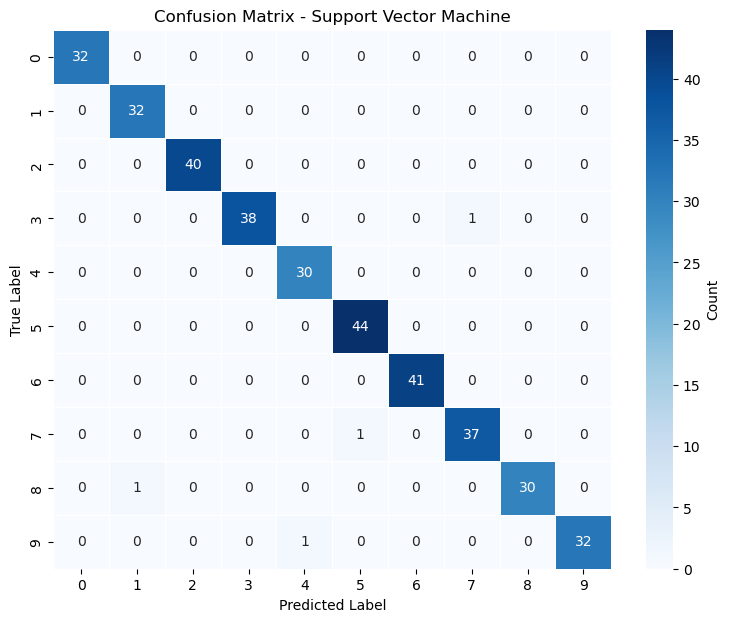

In [38]:
plt.figure(figsize=(9, 7))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names, yticklabels=digits.target_names,
            linewidths=.5, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()